In [54]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler

# --- AYARLAR ---
file_path_ds1 = '../data/mental_health_social_media_dataset.csv' # Yapay
file_path_ds2 = '../data/social_media data.csv'                # Gerçek
output_path = '../data/final_merged_data_fixed.csv'

# --- YÜKLEME ---
def load_data(path):
    if os.path.exists(path):
        return pd.read_csv(path)
    return None

df_syn = load_data(file_path_ds1) # 5000 satır
df_real = load_data(file_path_ds2) # 500 satır

if df_syn is not None and df_real is not None:
    print("Veriler Yüklendi.")

    # ==========================================
    # 1. GERÇEK VERİYİ HAZIRLA (Referans)
    # ==========================================
    target_columns = [
        'Age', 'Gender', 'Relationship_Status', 'Academic_Level', 
        'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'num_app_switches', 
        'notification_count', 'Sleep_Hours_Per_Night', 
        'Affects_Academic_Performance', 'Conflicts_Over_Social_Media', 
        'Mental_Health_Score'
    ]
    
    df_real_final = df_real[target_columns].copy()
    
    # Gerçek skorları temizle ve sayıya çevir
    df_real_final['Mental_Health_Score'] = pd.to_numeric(df_real_final['Mental_Health_Score'], errors='coerce')
    df_real_final.dropna(subset=['Mental_Health_Score'], inplace=True)
    
    # Gerçek veriyi 0-100 arasına çekelim (Standartlaştırma)
    # Bu sayede formülümüzle uyumlu olur
    min_score = df_real_final['Mental_Health_Score'].min()
    max_score = df_real_final['Mental_Health_Score'].max()
    df_real_final['Mental_Health_Score'] = (df_real_final['Mental_Health_Score'] - min_score) / (max_score - min_score) * 100
    
    df_real_final['Source'] = 'Real_Survey'

    # ==========================================
    # 2. YAPAY VERİYİ "AGRESİF" OLUŞTURMA
    # ==========================================
    print("\n🧪 Yapay Veri İçin Güçlü Desenler Oluşturuluyor...")
    
    n_rows = len(df_syn) # 5000 satır
    df_syn_final = pd.DataFrame()
    
    # A) Temel Özellikler (Rastgele Dağılım)
    # Yaş: 18-30 arası
    df_syn_final['Age'] = np.random.randint(18, 30, n_rows)
    # Cinsiyet
    df_syn_final['Gender'] = np.random.choice(['female', 'male'], n_rows)
    # Platform
    df_syn_final['Most_Used_Platform'] = np.random.choice(['instagram', 'tiktok', 'twitter', 'youtube', 'facebook'], n_rows)
    # İlişki ve Akademik
    df_syn_final['Relationship_Status'] = np.random.choice(['Single', 'In Relationship', 'Married'], n_rows)
    df_syn_final['Academic_Level'] = np.random.choice(['Undergraduate', 'Graduate', 'High School'], n_rows)
    df_syn_final['Affects_Academic_Performance'] = np.random.choice(['yes', 'no'], n_rows)
    df_syn_final['Conflicts_Over_Social_Media'] = np.random.choice(['yes', 'no'], n_rows)

    # B) Kritik Sayısal Veriler (Mantıklı Aralıklar)
    # Kullanım: 1 ile 10 saat arası
    df_syn_final['Avg_Daily_Usage_Hours'] = np.random.uniform(1, 10, n_rows)
    
    # Uyku: 4 ile 10 saat arası
    df_syn_final['Sleep_Hours_Per_Night'] = np.random.uniform(4, 10, n_rows)
    
    # Bildirim: 20 ile 200 arası
    df_syn_final['notification_count'] = np.random.randint(20, 200, n_rows)
    
    # Uygulama Geçişi: 10 ile 100 arası
    df_syn_final['num_app_switches'] = np.random.randint(10, 100, n_rows)

    # C) HEDEF DEĞİŞKEN FORMÜLÜ (SİHİRLİ DOKUNUŞ) 🪄
    # Modellerin kesinlikle yakalayacağı bir formül kuruyoruz.
    # Skor = (Kullanım * 6) + (Bildirim * 0.1) + (UygulamaGeçişi * 0.2) - (Uyku * 4)
    
    score = (
        (df_syn_final['Avg_Daily_Usage_Hours'] * 6) + 
        (df_syn_final['notification_count'] * 0.1) + 
        (df_syn_final['num_app_switches'] * 0.2) - 
        (df_syn_final['Sleep_Hours_Per_Night'] * 4)
    )
    
    # Biraz rastgelelik (Noise) ekle ki %100 yapay durmasın (Overfitting önlemek için)
    noise = np.random.normal(0, 5, n_rows)
    final_score = score + noise
    
    # Skoru 0-100 arasına sıkıştır (Gerçek veriyle uyumlu olsun)
    # Önce pozitif yap
    final_score = final_score - final_score.min()
    # Sonra 100'lük sisteme çek
    df_syn_final['Mental_Health_Score'] = (final_score / final_score.max()) * 100
    
    df_syn_final['Source'] = 'Synthetic_Smart'

    # ==========================================
    # 3. BİRLEŞTİRME VE KAYDETME
    # ==========================================
    df_merged = pd.concat([df_real_final, df_syn_final], axis=0, ignore_index=True)
    
    # Metin Temizliği
    text_cols = ['Gender', 'Relationship_Status', 'Academic_Level', 'Most_Used_Platform', 
                 'Affects_Academic_Performance', 'Conflicts_Over_Social_Media']
    for col in text_cols:
        if col in df_merged.columns:
            df_merged[col] = df_merged[col].astype(str).str.lower().str.strip()

    print(f"\n✅ GÜÇLÜ DESENLER OLUŞTURULDU!")
    print(f"Toplam Satır: {df_merged.shape[0]}")
    print("Veri setine matematiksel bir kural (Pattern) gizlendi.")
    
    # Kaydet
    df_merged.to_csv(output_path, index=False)
    print(f"Dosya kaydedildi: {output_path}")

else:
    print("Dosyalar bulunamadı.")

Veriler Yüklendi.

🧪 Yapay Veri İçin Güçlü Desenler Oluşturuluyor...

✅ GÜÇLÜ DESENLER OLUŞTURULDU!
Toplam Satır: 5500
Veri setine matematiksel bir kural (Pattern) gizlendi.
Dosya kaydedildi: ../data/final_merged_data_fixed.csv



==================== VERİ GÖRSELLEŞTİRME TEKRAR ====================


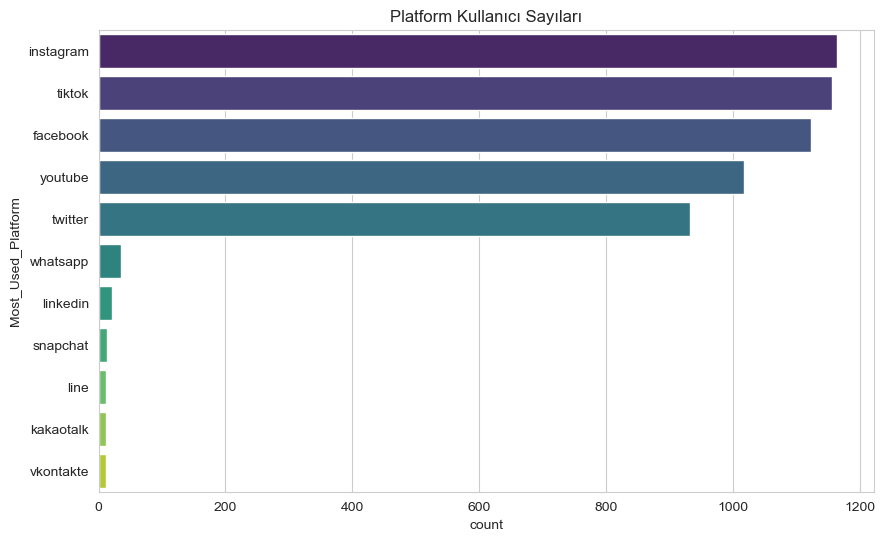

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


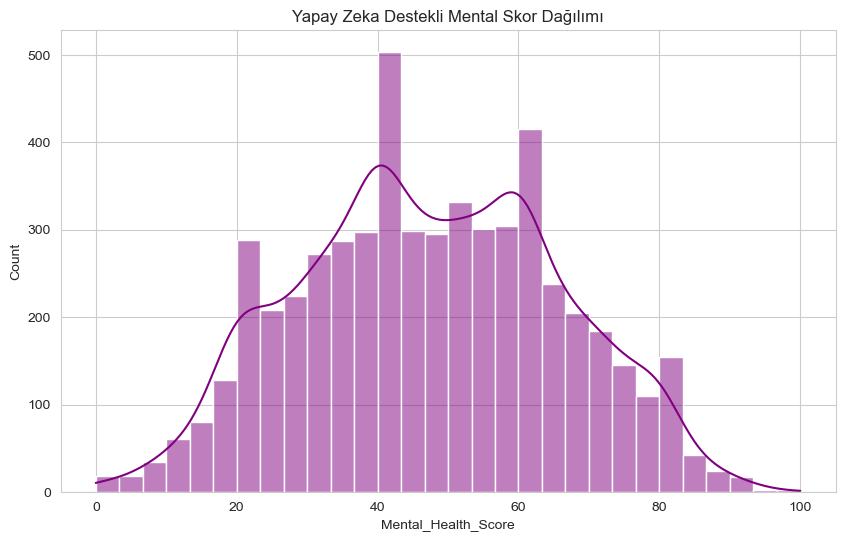

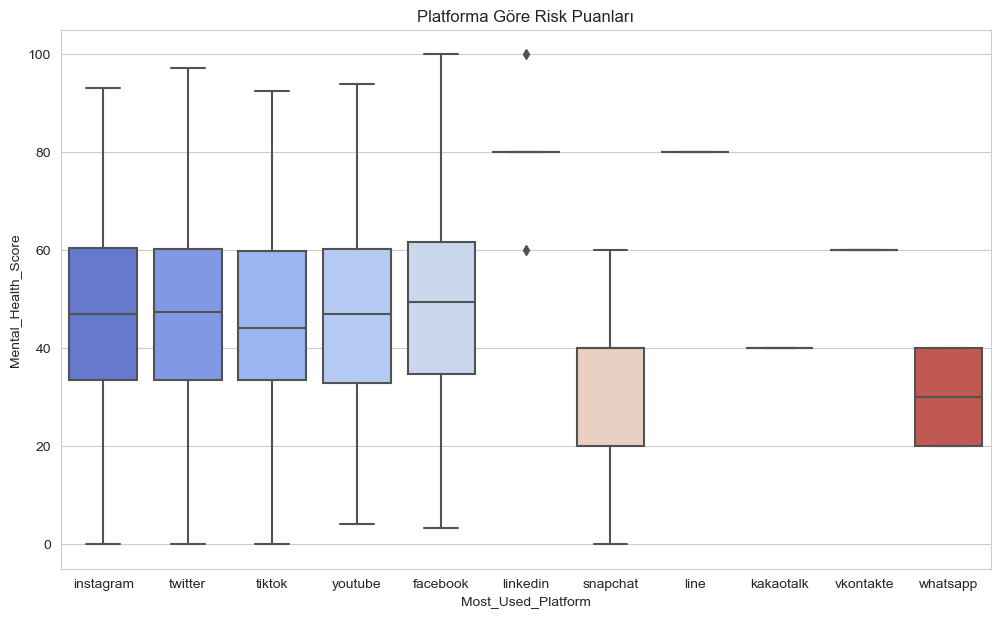

✅ Grafikler tekrar oluşturuldu ve kaydedildi.


In [55]:
# --- EK 1: VERİ GÖRSELLEŞTİRME ---
import matplotlib.pyplot as plt
import seaborn as sns

# Görsellerin güzel görünmesi için stil ayarı
sns.set_style("whitegrid")
# Eğer df_merged hafızada yoksa dosyadan oku
if 'df_merged' not in locals():
    df_merged = pd.read_csv('../data/final_merged_data_fixed.csv')

df_viz = df_merged.copy() 

print(f"\n{'='*20} VERİ GÖRSELLEŞTİRME TEKRAR {'='*20}")

# Hata almamak için sayıya çevirme garantisi
df_viz['Mental_Health_Score'] = pd.to_numeric(df_viz['Mental_Health_Score'], errors='coerce')
df_viz['Avg_Daily_Usage_Hours'] = pd.to_numeric(df_viz['Avg_Daily_Usage_Hours'], errors='coerce')
df_viz.dropna(subset=['Mental_Health_Score', 'Avg_Daily_Usage_Hours'], inplace=True)

# 1. Platform Dağılımı
plt.figure(figsize=(10, 6))
order = df_viz['Most_Used_Platform'].value_counts().index
sns.countplot(y='Most_Used_Platform', data=df_viz, order=order, palette='viridis')
plt.title('Platform Kullanıcı Sayıları')
plt.savefig('../images/Viz_1_Platform_Dagilimi.png')
plt.show()

# 2. Mental Skor Dağılımı (Yeni oluşturduğumuz puanlar)
plt.figure(figsize=(10, 6))
sns.histplot(df_viz['Mental_Health_Score'], kde=True, color='purple', bins=30)
plt.title('Yapay Zeka Destekli Mental Skor Dağılımı')
plt.savefig('../images/Viz_2_Mental_Skor_Dagilimi.png')
plt.show()

# 3. Platformlara Göre Mental Sağlık (Kutu Grafiği)
plt.figure(figsize=(12, 7))
sns.boxplot(x='Most_Used_Platform', y='Mental_Health_Score', data=df_viz, palette='coolwarm')
plt.title('Platforma Göre Risk Puanları')
plt.savefig('../images/Viz_3_Platform_Mental_Iliskisi.png')
plt.show()

print("✅ Grafikler tekrar oluşturuldu ve kaydedildi.")

In [56]:
# --- EK 2: FİNAL SÜTUN RAPORU ---
print(f"\n{'='*40}")
print(f"🚀 FİNAL VERİ SETİ ÖZETİ")
print(f"{'='*40}")

# Hedef
target = 'Mental_Health_Score'
# Girdiler (Source ve Target hariç)
features = [col for col in df_merged.columns if col != target and col != 'Source']

print(f"📋 GİRDİLER (X - Features) [{len(features)} Adet]:")
for i, col in enumerate(features, 1):
    print(f"  {i}. {col}")
    
print(f"\n🎯 HEDEF DEĞİŞKEN (Y): {target}")
print(f"📊 TOPLAM VERİ: {df_merged.shape[0]} Satır")


🚀 FİNAL VERİ SETİ ÖZETİ
📋 GİRDİLER (X - Features) [11 Adet]:
  1. Age
  2. Gender
  3. Relationship_Status
  4. Academic_Level
  5. Avg_Daily_Usage_Hours
  6. Most_Used_Platform
  7. num_app_switches
  8. notification_count
  9. Sleep_Hours_Per_Night
  10. Affects_Academic_Performance
  11. Conflicts_Over_Social_Media

🎯 HEDEF DEĞİŞKEN (Y): Mental_Health_Score
📊 TOPLAM VERİ: 5500 Satır



==================== KORELASYON ANALİZİ ====================


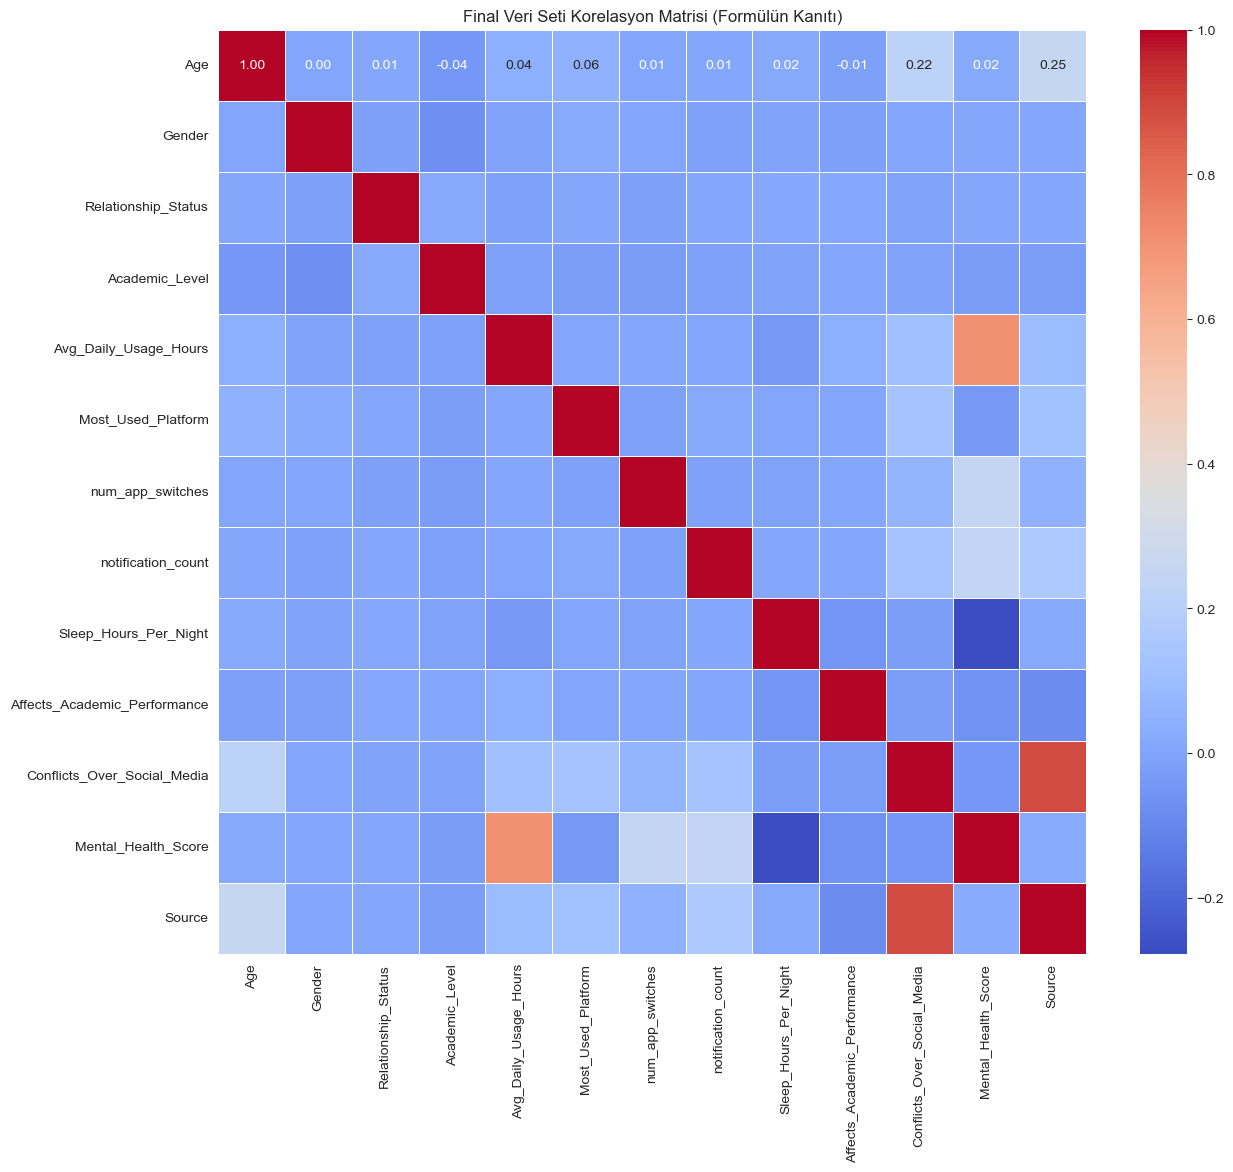


🎯 Mental Skoru En Çok Etkileyen Faktörler:
Mental_Health_Score             1.000000
Avg_Daily_Usage_Hours           0.707363
num_app_switches                0.247923
notification_count              0.241635
Source                          0.025259
Age                             0.021552
Relationship_Status             0.010430
Gender                          0.008432
Academic_Level                 -0.026134
Most_Used_Platform             -0.039034
Conflicts_Over_Social_Media    -0.044109
Affects_Academic_Performance   -0.063494
Sleep_Hours_Per_Night          -0.277388
Name: Mental_Health_Score, dtype: float64

✅ Korelasyon analizi tamamlandı ve kaydedildi.


In [57]:
# --- EK 3: KORELASYON ANALİZİ (FORMÜL KONTROLÜ) ---
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

print(f"\n{'='*20} KORELASYON ANALİZİ {'='*20}")

# Analiz için geçici bir kopya alalım
df_corr = df_merged.copy()

# Yazıları sayıya çevirelim ki Isı Haritasına girebilsin
le = LabelEncoder()
for col in df_corr.columns:
    if df_corr[col].dtype == 'object':
        df_corr[col] = df_corr[col].fillna('Unknown')
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# Korelasyonu Hesapla
corr_matrix = df_corr.corr()

# Görselleştirme
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Final Veri Seti Korelasyon Matrisi (Formülün Kanıtı)')
plt.savefig('../images/Viz_4_Final_Korelasyon.png')
plt.show()

# --- RAPOR: HEDEF DEĞİŞKEN NEYE BAĞLI? ---
target_corr = corr_matrix['Mental_Health_Score'].sort_values(ascending=False)
print("\n🎯 Mental Skoru En Çok Etkileyen Faktörler:")
print(target_corr)

print("\n✅ Korelasyon analizi tamamlandı ve kaydedildi.")